In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# Grab the training images from destination, resize them, and append them to the placeholder lists
train_images = []

train_files = sorted(glob.glob ("./Train_Images/IMG_*.jpg"))

for myFile in train_files:
    img = cv2.imread(myFile)
    img = cv2.resize(img,(256,256))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_images.append(img)

print(np.array(train_images).shape)

(75, 256, 256, 3)


In [3]:
# Train images' ROI (face rectangle) coordinates [x,y,w,h] where (x,y) are the coords of top left corner
# (in order of image name)
quentin_train_ROI = [[98, 70, 51, 51], [100, 71, 36, 43], [90, 75, 35, 50], [122, 73, 30, 48], [125, 75, 35, 50], [98, 60, 67, 75], [80, 62, 55, 73], [80, 55, 47, 78], [100, 75, 50, 68], [98, 62, 51, 90], [55, 70, 120, 133], [80, 72, 85, 125], [70, 90, 80, 120], [60, 67, 90, 127], [97, 54, 88, 156]]
connor_train_ROI = [[112, 94, 46, 46], [103, 98, 45, 45], [103, 103, 38, 47], [109, 96, 39, 49], [115, 104, 30, 47], [92, 80, 60, 65], [100, 77, 45, 67], [70, 83, 51, 67], [100, 80, 50, 70], [106, 81, 44, 69], [80, 60, 105, 122], [70, 63, 105, 125], [50, 80, 80, 120], [98, 75, 80, 118], [112, 59, 75, 131]]
bogdan_train_ROI = [[100, 105, 57, 57], [120, 111, 27, 42], [128, 106, 35, 44], [95, 102, 38, 46], [89, 105, 36, 50], [95, 96, 62, 62], [124, 104, 47, 65], [131, 99, 52, 67], [91, 87, 65, 80], [76, 91, 60, 75], [68, 72, 133, 140], [89, 80, 100, 125], [107, 78, 80, 130], [45, 84, 115, 120], [60, 89, 102, 110]]
julien_train_ROI = [[94, 79, 51, 51], [112, 89, 37, 43], [110, 90, 35, 60], [120, 85, 40, 50], [110, 90, 45, 50], [95, 87, 59, 70], [108, 80, 50, 75], [100, 77, 50, 77], [95, 75, 50, 75], [110, 75, 50, 75], [75, 75, 95, 120], [90, 75, 90, 125], [75, 75, 100, 125], [77, 56, 127, 140], [100, 75, 80, 125]]
sarah_train_ROI = [[113, 103, 29, 29], [107, 95, 30, 30], [114, 95, 29, 29], [97, 101, 29, 29], [105, 104, 20, 32], [96, 81, 54, 54], [104, 84, 51, 51], [116, 90, 38, 44], [81, 88, 50, 50], [83, 90, 28, 40], [68, 83, 89, 89], [77, 80, 84, 84], [93, 91, 70, 80], [74, 94, 77, 77], [58, 86, 70, 102]] 

train_ROI = []

for i in range(len(quentin_train_ROI)):
    train_ROI.append(quentin_train_ROI[i])

for i in range(len(connor_train_ROI)):
    train_ROI.append(connor_train_ROI[i])
    
for i in range(len(bogdan_train_ROI)):
    train_ROI.append(bogdan_train_ROI[i])
    
for i in range(len(julien_train_ROI)):
    train_ROI.append(julien_train_ROI[i])
    
for i in range(len(sarah_train_ROI)):
    train_ROI.append(sarah_train_ROI[i])

print(np.array(train_ROI).shape)

(75, 4)


Num keypoints: 32
Num descriptors per keypoint: 128


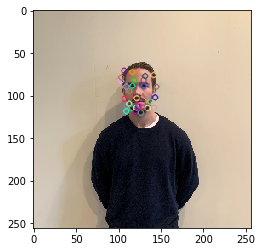

Num keypoints: 23
Num descriptors per keypoint: 128


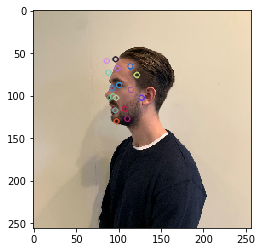

Num keypoints: 48
Num descriptors per keypoint: 128


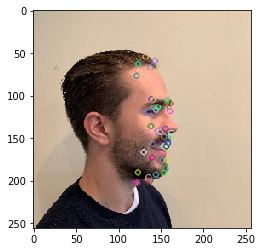

Num keypoints: 34
Num descriptors per keypoint: 128


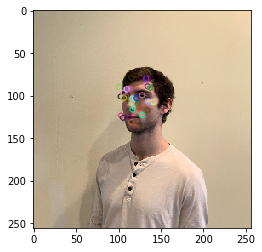

Num keypoints: 51
Num descriptors per keypoint: 128


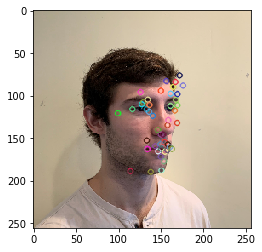

Num keypoints: 39
Num descriptors per keypoint: 128


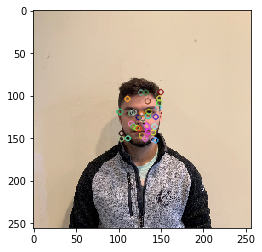

Num keypoints: 52
Num descriptors per keypoint: 128


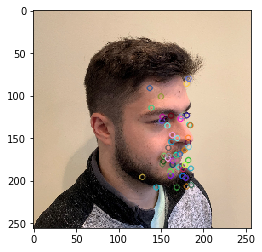

Num keypoints: 24
Num descriptors per keypoint: 128


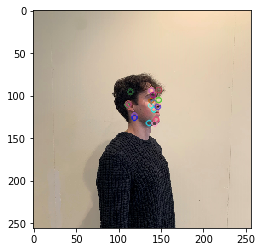

Num keypoints: 55
Num descriptors per keypoint: 128


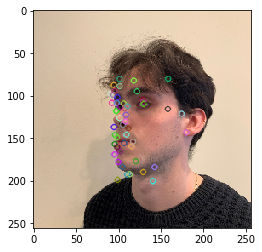

Num keypoints: 19
Num descriptors per keypoint: 128


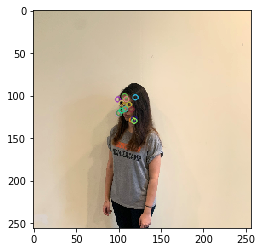

Num keypoints: 39
Num descriptors per keypoint: 128


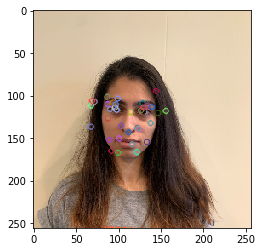

In [4]:
sift_obj = cv2.xfeatures2d.SIFT_create()

train_features = []
train_descriptors = []

for i in range(len(train_ROI)):
    [x,y,w,h] = train_ROI[i]
    
    # create a mask image filled with zeros, the size of original image
    mask = np.zeros(train_images[i].shape[:2], dtype=np.uint8)
    
    # draw your selected ROI on the mask image
    cv2.rectangle(mask, (x,y), ((x+w),(y+h)), (255), thickness = -1)
    
    # provide mask to the detect method
    keypoints, descriptors = sift_obj.detectAndCompute(train_images[i],mask)

    train_features.append(keypoints)
    train_descriptors.append(descriptors)
    
    if (i%7==0):
        img_display = cv2.drawKeypoints(train_images[i],keypoints,train_images[i])
        print('Num keypoints: '+ str(len(keypoints)))
        print('Num descriptors per keypoint: '+ str(descriptors.shape[1]))
#         plt.figure(figsize=(20,20))
        plt.imshow(img_display)
        plt.show()

In [5]:
# Grab the test images from destination, resize them, and append them to the placeholder lists
test_images = []

test_files = sorted(glob.glob("./Test_Images/IMG_*.jpg"))
for myFile in test_files:
    img = cv2.imread(myFile)
    img = cv2.resize(img,(256,256))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    test_images.append(img)

print(np.array(test_images).shape)

(70, 256, 256, 3)


In [6]:
# Test images' ROI (face rectangle) coordinates [x,y,w,h] where (x,y) are the coords of top left corner
# (in order of image name)
bogdan_test_ROI = [[96, 111,  60,  58], [80, 112,  60,  60], [55, 110,  58,  55], [130,  100,  63,  65], [137,  105,  50,  73], [115, 70,  53,  88], [105, 70,  53,  93], [70,  76, 78,  80], [71,  80,  63,  78], [55,  80,  63,  78], [88,  82,  70,  73], [92,  82,  70,  70], [90,  80,  70,  70], [97,  81,  64,  64]]
quentin_test_ROI = [[98, 84, 46, 46], [45, 75, 50, 68], [50, 75, 50, 60], [130, 77, 60, 60], [130, 77, 50, 60], [84, 58, 51, 51],  [72, 60, 55, 58], [68, 56, 52, 58], [96, 56, 47, 60], [120, 60, 45, 64], [91, 66, 57, 57], [98, 71, 56, 62], [95, 86, 58, 58], [101, 86, 60, 62]]
sarah_test_ROI = [[113, 101, 45, 45], [119,  98,  40,  46], [120, 105,  30,  45], [97, 105,  36,  40], [91, 100,  26,  40], [109,  79,  48,  48], [120,  77,  45,  49], [122,  74,  40,  55], [95,  78, 35,  49], [93,  78, 30,  49], [101,  79,  47,  47], [105,  80,  40,  47], [85,  78,  49,  49], [113,  77,  46,  46]]
connor_test_ROI = [[110,  98,  51,  46], [90,  95,  51,  46], [85,  85,  51,  48], [120,  95,  51,  46], [140,  95,  47,  46], [120,  60,  52,  55], [110,  60,  51,  46], [94, 56, 50, 50], [110,  53,  46,  56], [107,  51,  51,  54], [106,  66,  51,  53], [108,  68,  50,  50], [104,  74,  37,  37], [106,  73,  44,  44]]
julien_test_ROI = [[130,  85,  45,  55], [128,  91,  45,  45], [115,  96,  49,  49], [110,  96,  49,  49], [103,  85,  49,  49], [110, 70, 48, 58], [109, 70, 48, 48], [93, 60, 62, 62], [93, 60, 54, 62], [100, 65, 50, 58], [94, 76, 54, 54], [95, 70, 55, 55], [111,  79,  49,  49], [98, 73, 59, 59]]

test_ROI = []

for i in range(len(bogdan_test_ROI)):
    test_ROI.append(bogdan_test_ROI[i])

for i in range(len(quentin_test_ROI)):
    test_ROI.append(quentin_test_ROI[i])
    
for i in range(len(sarah_test_ROI)):
    test_ROI.append(sarah_test_ROI[i])
    
for i in range(len(connor_test_ROI)):
    test_ROI.append(connor_test_ROI[i])
    
for i in range(len(julien_test_ROI)):
    test_ROI.append(julien_test_ROI[i])

print(np.array(test_ROI).shape)

(70, 4)


Num keypoints: 40
Num descriptors per keypoint: 128


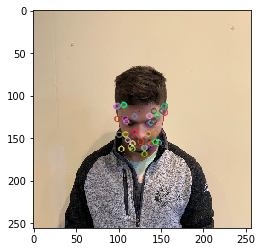

Num keypoints: 61
Num descriptors per keypoint: 128


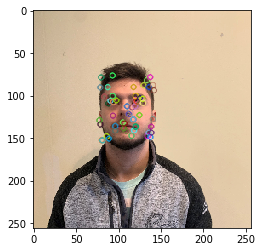

Num keypoints: 21
Num descriptors per keypoint: 128


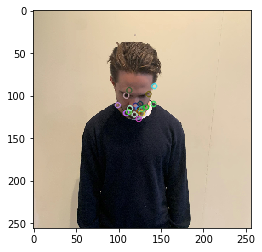

Num keypoints: 30
Num descriptors per keypoint: 128


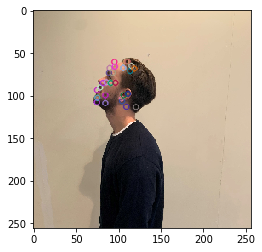

Num keypoints: 12
Num descriptors per keypoint: 128


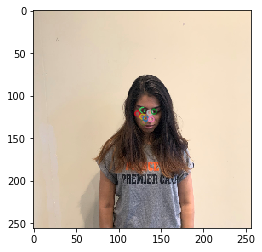

Num keypoints: 23
Num descriptors per keypoint: 128


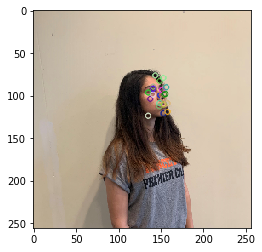

Num keypoints: 24
Num descriptors per keypoint: 128


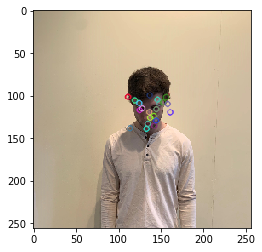

Num keypoints: 32
Num descriptors per keypoint: 128


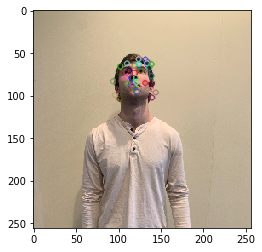

Num keypoints: 28
Num descriptors per keypoint: 128


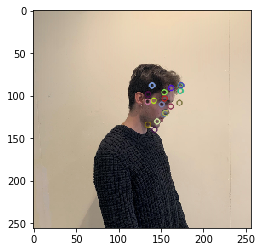

Num keypoints: 36
Num descriptors per keypoint: 128


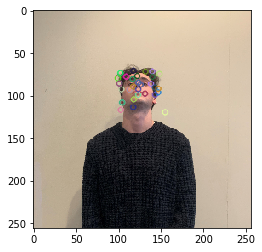

In [7]:
test_features = []
test_descriptors = []

for i in range(len(test_ROI)):
    [x,y,w,h] = test_ROI[i]
    
    # create a mask image filled with zeros, the size of original image
    mask = np.zeros(test_images[i].shape[:2], dtype=np.uint8)
    
    # draw your selected ROI on the mask image
    cv2.rectangle(mask, (x,y), ((x+w),(y+h)), (255), thickness = -1)
    
    # provide mask to the detect method
    keypoints, descriptors = sift_obj.detectAndCompute(test_images[i],mask)

    test_features.append(keypoints)
    test_descriptors.append(descriptors)
    
    if (i%7==0):
        img_display =cv2.drawKeypoints(test_images[i],keypoints,test_images[i])
        print('Num keypoints: '+ str(len(keypoints)))
        print('Num descriptors per keypoint: '+ str(descriptors.shape[1]))
#         plt.figure(figsize=(20,20))
        plt.imshow(img_display)
        plt.show()